In [31]:
import pandas as pd
import wave
import numpy as np
import matplotlib.pyplot as plt
import os


In [32]:
df = pd.read_csv('df_unique_first.csv')
df

,FileName,Habitat,Type,Season,Moment
0,01_KE-US/KE-US_20200101_000000_MN_1,1,Close,Wet,MN
1,01_KE-US/KE-US_20200101_090000_SR_1,1,Close,Wet,SR
2,01_KE-US/KE-US_20200101_120000_MD_1,1,Close,Wet,MD
3,01_KE-US/KE-US_20200101_150000_SS_1,1,Close,Wet,SS
4,01_KE-US/KE-US_20200601_010000_MN_1,1,Close,Dry,MN
...,...,...,...,...,...
67,09_WD-AU/WD-AU_20150701_16_SS_1,9,Close,Dry,SS
68,09_WD-AU/WD-AU_20160101_00_MN_1,9,Close,Wet,MN
69,09_WD-AU/WD-AU_20160101_04_SR_1,9,Close,Wet,SR
70,09_WD-AU/WD-AU_20160101_11_MD_1,9,Close,Wet,MD


In [33]:
df['FileName'] = df['FileName'].str.split('/').str[-1]
df

,FileName,Habitat,Type,Season,Moment
0,KE-US_20200101_000000_MN_1,1,Close,Wet,MN
1,KE-US_20200101_090000_SR_1,1,Close,Wet,SR
2,KE-US_20200101_120000_MD_1,1,Close,Wet,MD
3,KE-US_20200101_150000_SS_1,1,Close,Wet,SS
4,KE-US_20200601_010000_MN_1,1,Close,Dry,MN
...,...,...,...,...,...
67,WD-AU_20150701_16_SS_1,9,Close,Dry,SS
68,WD-AU_20160101_00_MN_1,9,Close,Wet,MN
69,WD-AU_20160101_04_SR_1,9,Close,Wet,SR
70,WD-AU_20160101_11_MD_1,9,Close,Wet,MD


In [34]:
df['Habitat'] = df['Habitat'].astype(str)
df['Season'] = df['Season'].astype(str)
df['Moment'] = df['Moment'].astype(str)

Plotting waveforms for the following files:
- HJ-FR_20190202_000000_MN_1


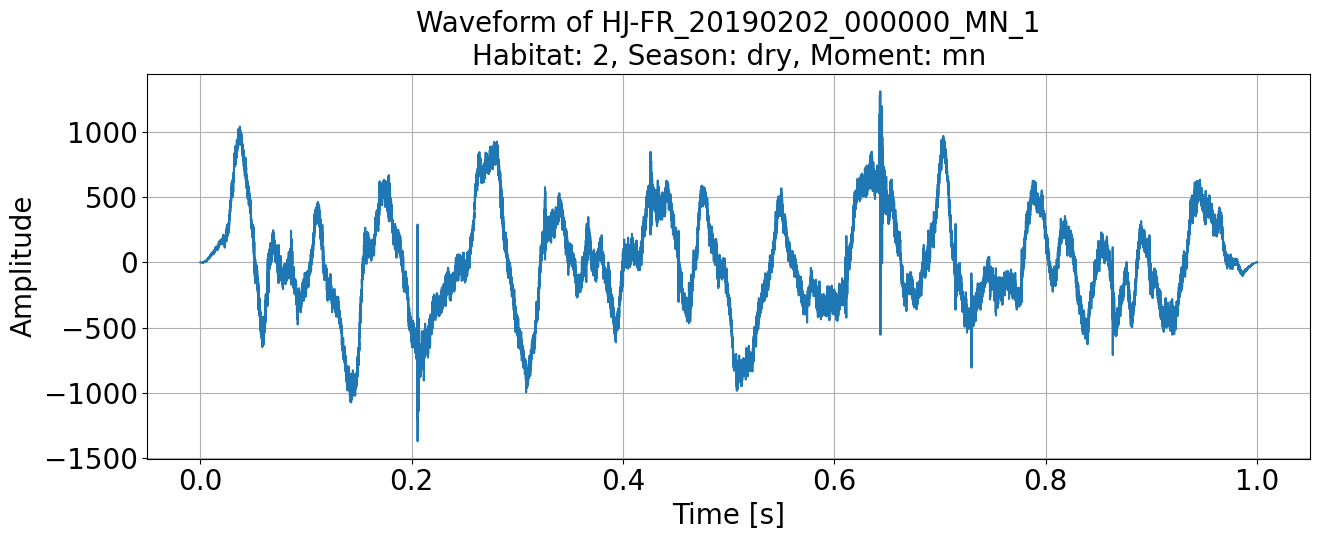

- HJ-FR_20190202_071500_SR_1


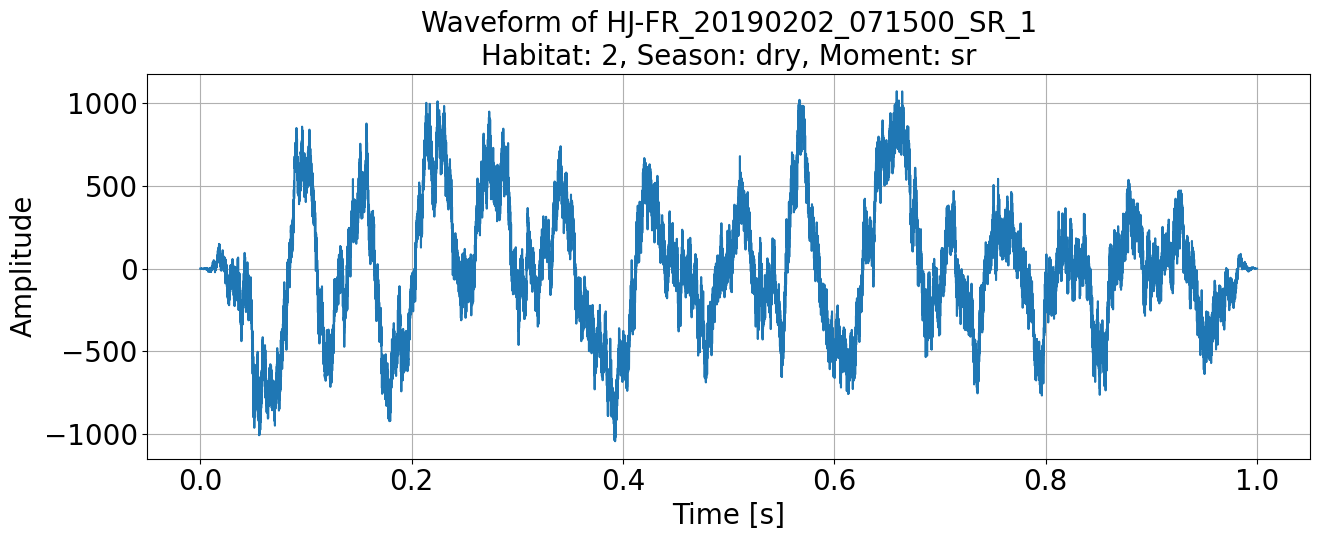

- HJ-FR_20190202_130000_MD_1


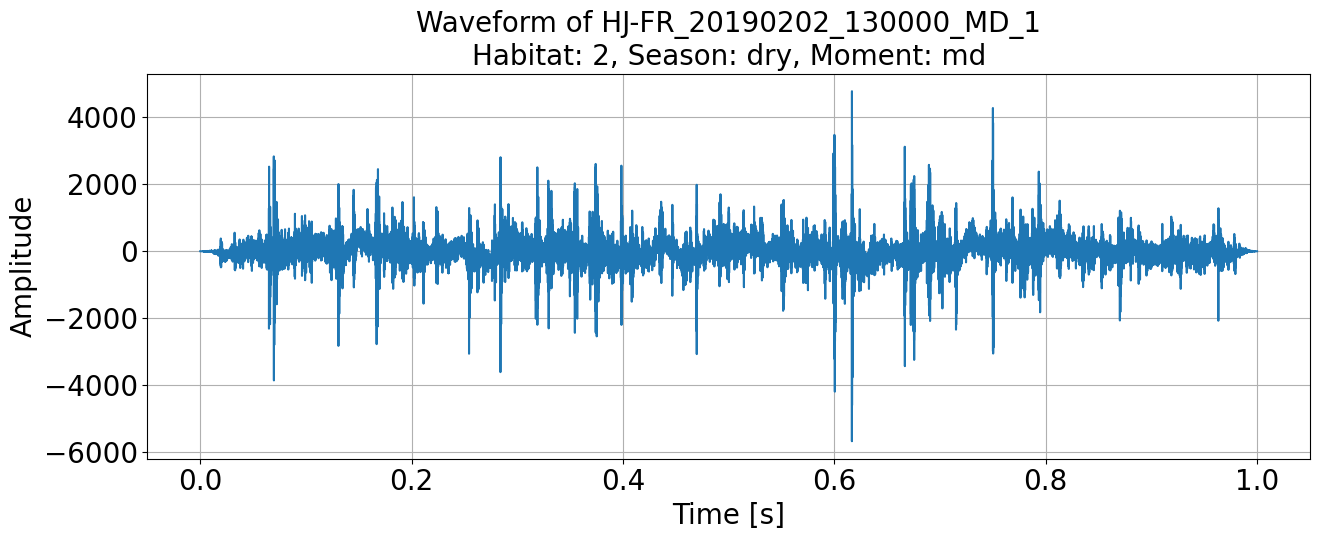

- HJ-FR_20190202_174500_SS_1


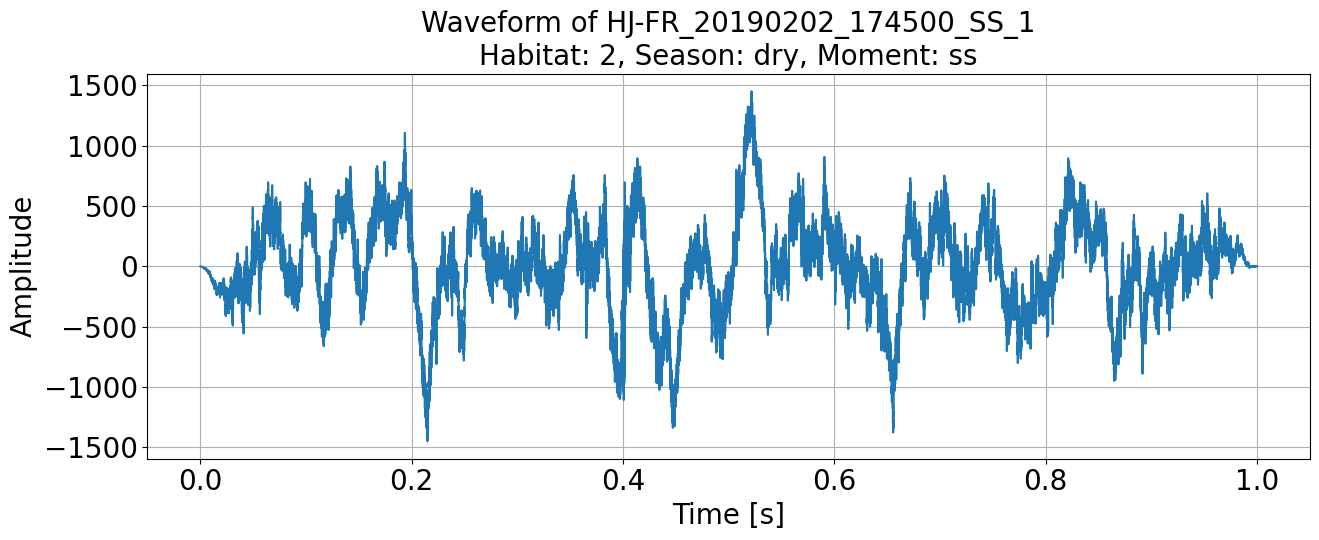

In [35]:

def find_filenames(habitat, season, moment):
    habitat = habitat.strip()
    season = season.strip()
    moment = moment.strip()
    
    df['Habitat'] = df['Habitat'].astype(str).str.lower()
    df['Season'] = df['Season'].astype(str).str.lower()
    df['Moment'] = df['Moment'].astype(str).str.lower()
    
    habitat = habitat.lower()
    season = season.lower()
    moment = moment.lower()

    filtered_df = df[
        ((df['Habitat'] == habitat) | (habitat == '-')) &
        ((df['Season'] == season) | (season == '-')) &
        ((df['Moment'] == moment) | (moment == '-'))
    ]

    if filtered_df.empty:
        print("No matching records found.")
        return None, None

    file_names = filtered_df['FileName'].tolist()
    habitat_values = filtered_df['Habitat'].tolist()
    season_values = filtered_df['Season'].tolist()
    moment_values = filtered_df['Moment'].tolist()
    return file_names, habitat_values, season_values, moment_values

def plot_waveform(file_name, habitat_value, season_value, moment_value):
    file_path = os.path.join('Selected_WAV_Files', file_name + '.wav')

    try:
        wav_file = wave.open(file_path, 'rb')
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return

    num_frames = wav_file.getnframes()
    frames = wav_file.readframes(num_frames)
    signal_array = np.frombuffer(frames, dtype=np.int16)

    sample_rate = wav_file.getframerate()

    time_axis = np.linspace(0, num_frames / sample_rate, num=num_frames)

    plt.figure(figsize=(15, 5))
    plt.plot(time_axis, signal_array)
    plt.title(f'Waveform of {file_name}\nHabitat: {habitat_value}, Season: {season_value}, Moment: {moment_value}', fontsize = 20)
    plt.xlabel('Time [s]', fontsize = 20)
    plt.ylabel('Amplitude', fontsize = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.grid(True)
    plt.show()

habitat = input("Enter Habitat (or '-' for all): ")
season = input("Enter Season (or '-' for all): ")
moment = input("Enter Moment (or '-' for all): ")

file_names, habitat_values, season_values, moment_values = find_filenames(habitat, season, moment)

if file_names:
    print("Plotting waveforms for the following files:")
    for i, file_name in enumerate(file_names):
        print(f"- {file_name}")
        plot_waveform(file_name, habitat_values[i], season_values[i], moment_values[i])
